# Trains CEBRA model for quick change in dimensions

Author: @emilyekstrum
<br> 11/17/25

In [2]:
import cebra
import itertools
import os
import torch
import matplotlib
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

from cebra import CEBRA
from glob import glob
from pathlib import Path
from dlab.psth_and_raster import trial_by_trial
from sklearn.model_selection import train_test_split

plt.style.use(['default', 'seaborn-v0_8-paper'])

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

c:\Users\denmanlab\.conda\envs\topology\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:
# load in data
with open('C:/Users/denmanlab/Desktop/Emily_rotation/data_to_run_at_home/V1luminance_flash.pkl', 'rb') as f:
    loaded = pkl.load(f)
    datas = loaded['datas']
    recordings = loaded['recordings']

print(recordings)

['d4', 'd5', 'd6', 'C155', 'C159', 'C160', 'C161']


In [4]:
#Juans code
train_steps = 30000
device      = 'cuda'
np.random.seed(1)

single_session = dict()

cebra_time_model = CEBRA(model_architecture = 'offset10-model',
                        batch_size         = 512,
                        learning_rate      = 3e-4,
                        #  temperature_mode   = "auto",
                        temperature        = 1,
                        #  min_temperature    = 1e-1,
                        output_dimension   = 32,
                        max_iterations     = train_steps,
                        num_hidden_units   = 128,
                        distance           = 'cosine',
                        conditional        = 'time', # time delta uses behavior/stimulus data to fit model
                        device             = device,
                        verbose            = True,
                        time_offsets       = 10,
                        optimizer          = 'adam',
                        )

for name, X in zip(recordings, datas):
    print(name)
    out_path = Path(os.path.join(r'C:\Users\denmanlab\Desktop\Emily_rotation\luminance_flash\CEBRA',name))
    out_path.mkdir(exist_ok=True)
    single_session[name] = {}

    cebra_time_model.fit(X.type(torch.FloatTensor))
    cebra_time = cebra_time_model.transform(X.type(torch.FloatTensor))

    cebra_time_model.save(os.path.join(out_path,f'{name}_v1_time.pt'),backend='torch')

    single_session[name]['model']      = cebra_time_model
    single_session[name]['embedding']  = cebra_time

with open(f'C:/Users/denmanlab/Desktop/Emily_rotation/luminance_flash/CEBRA/V1_32d_unsup_time_luminance_flash.pkl','wb') as f:
    pkl.dump(single_session,f)

d4


pos: -0.9919 neg:  6.2774 total:  5.2856 temperature:  1.0000: 100%|██████████| 30000/30000 [02:49<00:00, 177.09it/s]


d5


pos: -0.9970 neg:  6.2571 total:  5.2601 temperature:  1.0000: 100%|██████████| 30000/30000 [02:57<00:00, 169.20it/s]


d6


pos: -0.9964 neg:  6.2643 total:  5.2680 temperature:  1.0000: 100%|██████████| 30000/30000 [03:00<00:00, 166.28it/s]


C155


pos: -0.9472 neg:  6.3122 total:  5.3651 temperature:  1.0000: 100%|██████████| 30000/30000 [02:52<00:00, 174.41it/s]


C159


pos: -0.9908 neg:  6.3268 total:  5.3360 temperature:  1.0000: 100%|██████████| 30000/30000 [02:50<00:00, 176.17it/s]


C160


pos: -0.9928 neg:  6.3632 total:  5.3703 temperature:  1.0000: 100%|██████████| 30000/30000 [02:53<00:00, 173.25it/s]


C161


pos: -0.9951 neg:  6.2658 total:  5.2707 temperature:  1.0000: 100%|██████████| 30000/30000 [02:59<00:00, 167.32it/s]


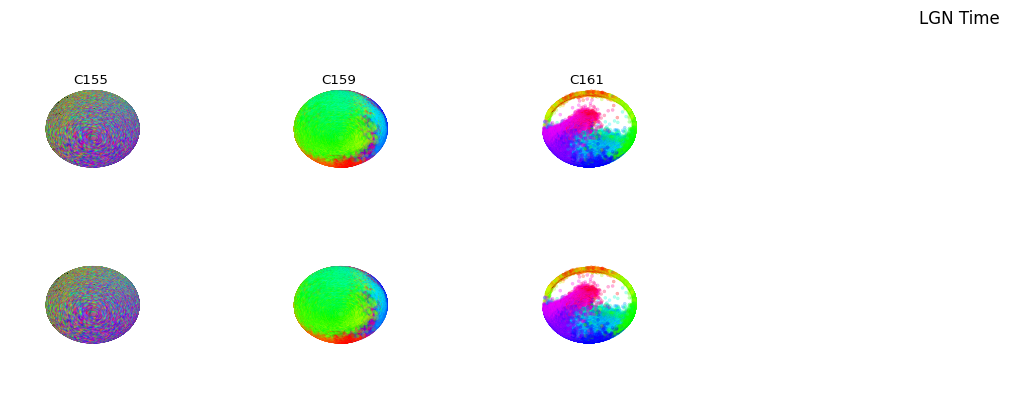

In [ ]:
# load in embeddings
single_session = pd.read_pickle(r'C:\Users\denmanlab\Desktop\Emily_rotation\chromatic_gratings\CEBRA\V1_3d_unsup_time_chromatic_gratings.pkl')


# quick plot of embeddings
fig = plt.figure(figsize=(20,4))

for n, name in enumerate(recordings):
    embedding = single_session[name]['embedding']
    # label     = single_session[name]['labels']

    ax = plt.subplot2grid((2, 8), (0, n), projection='3d')
    ax.scatter(embedding[:,0],
               embedding[:,1],
               embedding[:,2],
               s=5, alpha=0.3,
               cmap='hsv', c=np.linspace(0,1,len(embedding)), clim=(0,1), rasterized=True
               )
    ax.set_title(name, y=0.8)
    
    ax = plt.subplot2grid((2, 8), (1, n), projection='3d')
    ax.scatter(embedding[:,0],
               embedding[:,1],
               embedding[:,2],
               s=5, alpha=0.3,
               cmap='hsv', c=np.linspace(0,1,len(embedding)), clim=(0,1), rasterized=True
               )

for axs in fig.get_axes():
    axs.axis('off')
    axs.grid(False)
    axs.xaxis.pane.fill = False
    axs.yaxis.pane.fill = False
    axs.zaxis.pane.fill = False
    axs.xaxis.pane.set_edgecolor('w')
    axs.yaxis.pane.set_edgecolor('w')
    axs.zaxis.pane.set_edgecolor('w')

plt.subplots_adjust(wspace=0,
                    hspace=0)
plt.suptitle('LGN Time')
plt.tight_layout()
# plt.savefig(r'G:\cebra_v1_time.pdf',transparent=True)
plt.show()